 ## Расчетное задания по одномерной газовой динамике
 #### 43: Клин

#### Задание
Рассчитать  значение  угла  полураствора  клина  $\Theta$ и  соответствующий  ему  угол  наклона косого скачка  уплотнения $\beta$, при  котором число  Маха  за  скачком  $M_2=1$. Число  $M_1 = 1.2,  1.4, 1.6,  2.0,  3.0,  4.0,  5.0,  10.0;$
$k=\frac{C_p}{C_v}=1.67$

### (стр.242 $\S$62 (90)):
#### $$M^2_2 sin(\beta-\Theta)^2 = \frac{ 1 + \frac{k-1}{2} M^2_1 sin(\beta)^2}{k M^2_1 sin(\beta)^2 - \frac{k-1}{2}} $$
### Угол полураствора клина  $\Theta$ можно получить по следующей формуле (стр.241 $\S$62 (89)):
#### $$tg(\Theta)=\frac{sin(\beta)^2-\frac{1}{M_1^2}}{\frac{k+1}{2}-sin(\beta)^2+\frac{1}{M_1^2}}ctg(\beta) $$

In [2]:
# coding: utf8
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

M1 = np.array([1.2,1.4,1.6,2.0,3.0,4.0,5.0,10.0])
M2 = 1.0       # за скачком
k  = 1.67
Qi_iter = []
bi_iter = []
Qi = []
bi = []

In [3]:
def f1(m1,b):
    Q = f2(m1,b)
    top = 1.0 + (k-1.0)/2*m1**2*np.sin(b)**2
    floor = k*m1**2*np.sin(b)**2 -(k-1.0)/2
    right = M2**2*np.sin(b-Q)**2

    Qi_iter.append(Q)
    bi_iter.append(b)
    return top/floor - right

In [4]:
def f2(m1,b):
    return np.arctan((np.sin(b)**2-1.0/m1**2)/((k+1.0)/2.0-np.sin(b)**2+1.0/m1**2)/np.tan(b))

In [5]:
def MPD(f,m1,A,B): 
    eps = 1e-7    
    while abs(B-A) >= eps:
        c = (B+A)/2.0
        if f(m1,c) == 0.0:
            break
        if f(m1,A)*f(m1,c) < 0.0:
            B = c
        else:
            A = c
    return c

In [6]:
for m1 in M1:
    b_init = MPD(f2,m1,np.deg2rad(0.01), np.deg2rad(90.0))
    MPD(f1,m1,b_init,np.deg2rad(90.0))
    Qi.append(Qi_iter[-1])
    bi.append(bi_iter[-1])
    Qi_iter = []
    bi_iter = []

In [7]:
df = pd.DataFrame({
    'M1': M1,
    u'\u0398': np.rad2deg(Qi),
    u'\u03B2': np.rad2deg(bi)
 })
writer = pd.ExcelWriter('result.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()
df

,M1,Θ,β
0,1.2,3.260381,67.947513
1,1.4,7.816933,62.925364
2,1.6,12.172258,60.902972
3,2.0,19.069024,59.984527
4,3.0,28.016304,60.990713
5,4.0,31.671352,61.856862
6,5.0,33.457245,62.353785
7,10.0,35.933774,63.113607


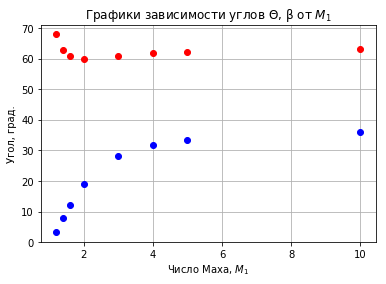

In [8]:
plt.title(u'Графики зависимости углов \u0398, \u03B2 от $M_1$')
plt.xlabel(u'Число Маха, $M_1$')
plt.ylabel(u'Угол, град.')
plt.plot(M1,np.rad2deg(bi),'ro')
plt.plot(M1,np.rad2deg(Qi),'bo')
plt.grid(True)
plt.savefig('result.png')